In [19]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('rumah.csv')
df

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\r\nLingkungan as...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,https://www.rumah123.com/properti/tangerang/ho...,5.880000e+08,Terbaru Cluster Minimalis Sudimara Dekat Stasiun,"Jombang, Tangerang",Jombang,Tangerang,-6.296615,106.704601,"Masjid, Taman, Tempat Jemuran, Keamanan 24 ja...",rumah,...,1300 mah,0.0,0.0,1.0,0.0,2022.0,baru,NaN,1.0,furnished
3549,https://www.rumah123.com/properti/tangerang/ho...,7.850000e+08,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,7.550000e+08,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,8.000000e+08,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,"Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...",rumah,...,2200 mah,0.0,0.0,2.0,0.0,2022.0,baru,selatan,0.0,furnished


In [21]:
df.shape  # menampilkan Berapa banyak kolom dan banyaknya baris dalam file csv

(3553, 27)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [23]:
df.isnull().sum() # Menampilkan missing data

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

In [24]:
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\r\nLingkungan as...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [25]:
print("Sebelum:", df.shape)
df.dropna(inplace=True)
print("Sesudah:", df.shape)


Sebelum: (3553, 27)
Sesudah: (1280, 27)


In [26]:
df.isnull().sum()  # Menampilkan missing data untuk mengecheck hasil dari 

#print("Sebelum:", df.shape)
#df.dropna(inplace=True)
#print("Sesudah:", df.shape)

url                     0
price_in_rp             0
title                   0
address                 0
district                0
city                    0
lat                     0
long                    0
facilities              0
property_type           0
ads_id                  0
bedrooms                0
bathrooms               0
land_size_m2            0
building_size_m2        0
carports                0
certificate             0
electricity             0
maid_bedrooms           0
maid_bathrooms          0
floors                  0
building_age            0
year_built              0
property_condition      0
building_orientation    0
garages                 0
furnishing              0
dtype: int64

In [27]:
#3 memilih untuk x = features yang mana ada 10 yang menentukan x ada.....
# y = targer yang sudah ditentukan untuk di tampilkan prediksi harga rumah yang dinamakan target

features = ['bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2',
            'floors', 'building_age', 'garages', 'property_type',
            'furnishing', 'property_condition']
target = 'price_in_rp'

In [28]:
#4

df.fillna({
    'building_age': df['building_age'].median(),
    'garages': 0,
    'property_condition': 'unknown',
    'furnishing': 'unknown'
}, inplace=True)


In [29]:
#5 encode untuk menconversi menjadi nilai untuk menampilkan harga prediksi rumah

encode_map = {
    'property_type': {'rumah': 1, 'unknown': 0},
    'furnishing': {'unfurnished': 3, 'furnished': 0, 'semi furnished': 2, 'unknown': 1},
    'property_condition': {'bagus': 0, 'bagus sekali': 1, 'unknown': 2}
}

for col, mapping in encode_map.items():
    df[col] = df[col].map(mapping)

In [30]:
#6 menentukan nilai x dan y serta training 

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#7 menampilkan model yang digunakan 

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [15]:
#9

# Evaluasi
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model ===")
print(f"R²   : {r2:.4f}")

=== Evaluasi Model ===
R²   : 0.7694


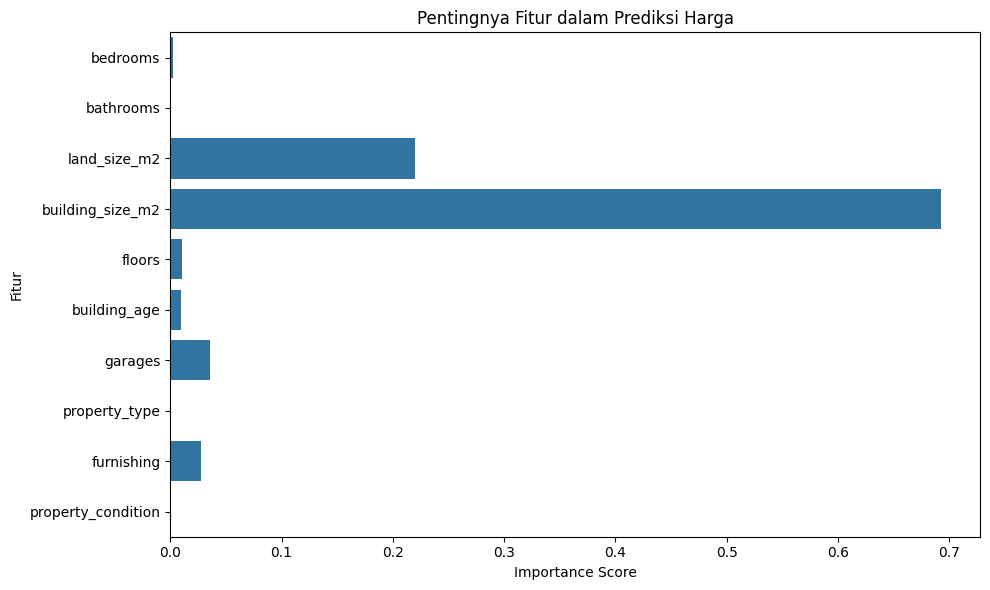

In [17]:
# grafik fitur fitur yang berperan dalam penilaian
plt.figure(figsize=(10, 6))
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Pentingnya Fitur dalam Prediksi Harga")
plt.xlabel("Importance Score")
plt.ylabel("Fitur")
plt.tight_layout()
plt.savefig("feature_importance.png")  
plt.show()

In [18]:
# 10. Simpan model dan informasi
model_data = {
    'model': model,
    'features': features,
    'encode_map': encode_map,
    'metrics': {
        'R2': r2
    }
}
joblib.dump(model_data, 'model_regresi_rumah.sav')
print("\nModel disimpan sebagai model_regresi_rumah.sav")


Model disimpan sebagai model_regresi_rumah.sav
